In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
model_data = pd.read_csv('model_data.csv')
agent_data = pd.read_csv('agent_data.csv')

In [44]:
model_data

,Time Step,Active Agents,Exited Agents,Cumulative Exited Agents,Agents per Cell - Main Exit,Agents per Cell - South West Exit,Agents per Cell - North West Exit,Agents per Cell - East Exit,Agents per Cell - South East Exit,Agents per Cell - First South Exit,Agents per Cell - First North Exit,Exit Speed
0,0,1501,0,0,0.000000,0.00,0.00,0.666667,0.0,0.0,0.00,NaN
1,1,1497,4,4,0.000000,0.00,0.00,0.500000,0.0,0.0,0.00,4.000000
2,2,1494,3,7,0.055556,0.00,0.00,0.833333,0.0,0.0,0.00,3.500000
3,3,1488,6,13,0.166667,0.00,0.00,0.833333,0.0,0.0,0.00,4.333333
4,4,1480,8,21,0.000000,0.25,0.25,1.000000,0.0,0.0,0.00,5.250000
...,...,...,...,...,...,...,...,...,...,...,...,...
96,96,430,6,1071,0.000000,0.00,0.00,0.833333,0.0,0.0,0.00,11.156250
97,97,425,5,1076,0.000000,0.00,0.00,0.833333,0.0,0.5,0.25,11.092784
98,98,417,8,1084,0.000000,0.00,0.00,0.833333,0.0,0.0,0.00,11.061224
99,99,412,5,1089,0.000000,0.00,0.00,0.666667,0.0,0.0,0.25,11.000000


In [38]:
model_data = model_data.rename(columns={'Unnamed: 0': 'Time Step'})
model_data['Exited Agents'] = model_data['Cumulative Exited Agents'].diff().fillna(model_data['Cumulative Exited Agents']).astype(int)
model_data['Exit Speed'] = model_data['Cumulative Exited Agents'] / model_data['Time Step']

In [18]:
agent_data

,Step,AgentID,Found Exit,Vo-gang,Number of friends,Friends,Drunkness
0,0,1,False,6.0,4.0,"[611, 712, 1458, 734]",3.0
1,0,2,False,69.0,2.0,"[890, 1416]",0.0
2,0,3,False,490.0,4.0,"[487, 340, 1052, 230]",2.0
3,0,4,False,387.0,3.0,"[356, 815, 1096]",2.0
4,0,5,False,187.0,3.0,"[780, 1253, 902]",1.0
...,...,...,...,...,...,...,...
8938,5,1497,False,465.0,0.0,[],3.0
8939,5,1498,False,184.0,4.0,"[1486, 912, 394, 221]",3.0
8940,5,1499,False,273.0,3.0,"[1426, 23, 1120]",0.0
8941,5,1500,False,42.0,2.0,"[572, 1392]",2.0


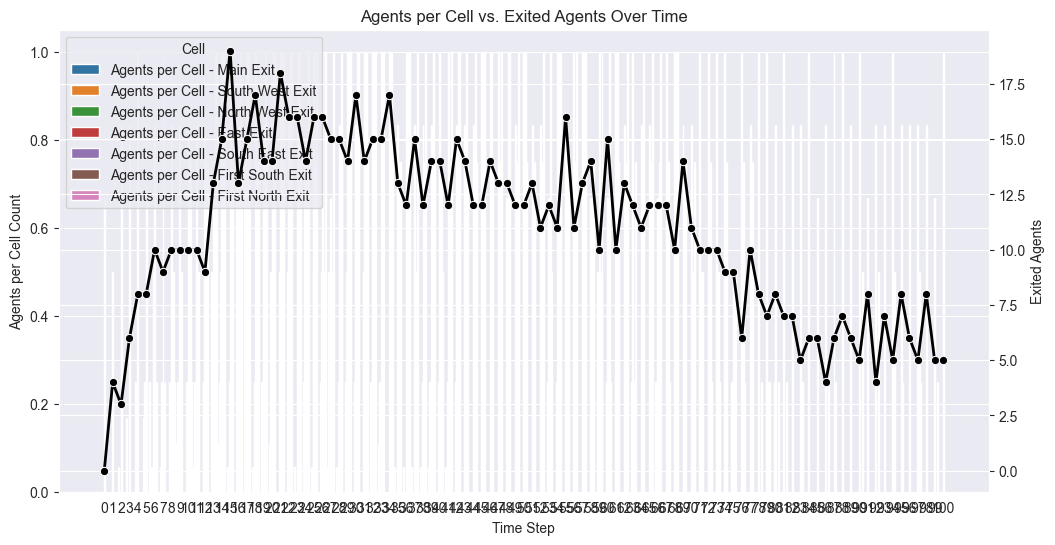

In [36]:
# If your dataframe is called model_data and has all the required columns:
df = model_data.copy()

# Columns that you want to melt together for the bar chart
melt_cols = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit"
]

# 1) Melt the DataFrame so each "Agents per Cell" column becomes a row
df_melt = df.melt(
    id_vars=["Time Step", "Exited Agents"],
    value_vars=melt_cols,
    var_name="Cell",
    value_name="Agents"
)

# 2) Create the bar plot (Agents per Cell) with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melt, x="Time Step", y="Agents", hue="Cell")

# 3) Create a secondary y-axis for plotting the line (Cumulative Exited Agents)
ax2 = ax.twinx()
sns.lineplot(
    data=df,
    x="Time Step",
    y="Exited Agents",
    ax=ax2,
    color="black",
    linewidth=2,
    marker="o"
)

# 4) Label and adjust the axes
ax.set_title("Agents per Cell vs. Exited Agents Over Time")
ax.set_ylabel("Agents per Cell Count")  # Left y-axis label
ax2.set_ylabel("Exited Agents")  # Right y-axis label

# 5) Adjust the legend
# The barplot legend comes from the hue parameter ("Cell"). 
# The line plot is a separate legend entry, so you can manage them as needed.
ax.legend(loc="upper left", title="Cell")

plt.show()

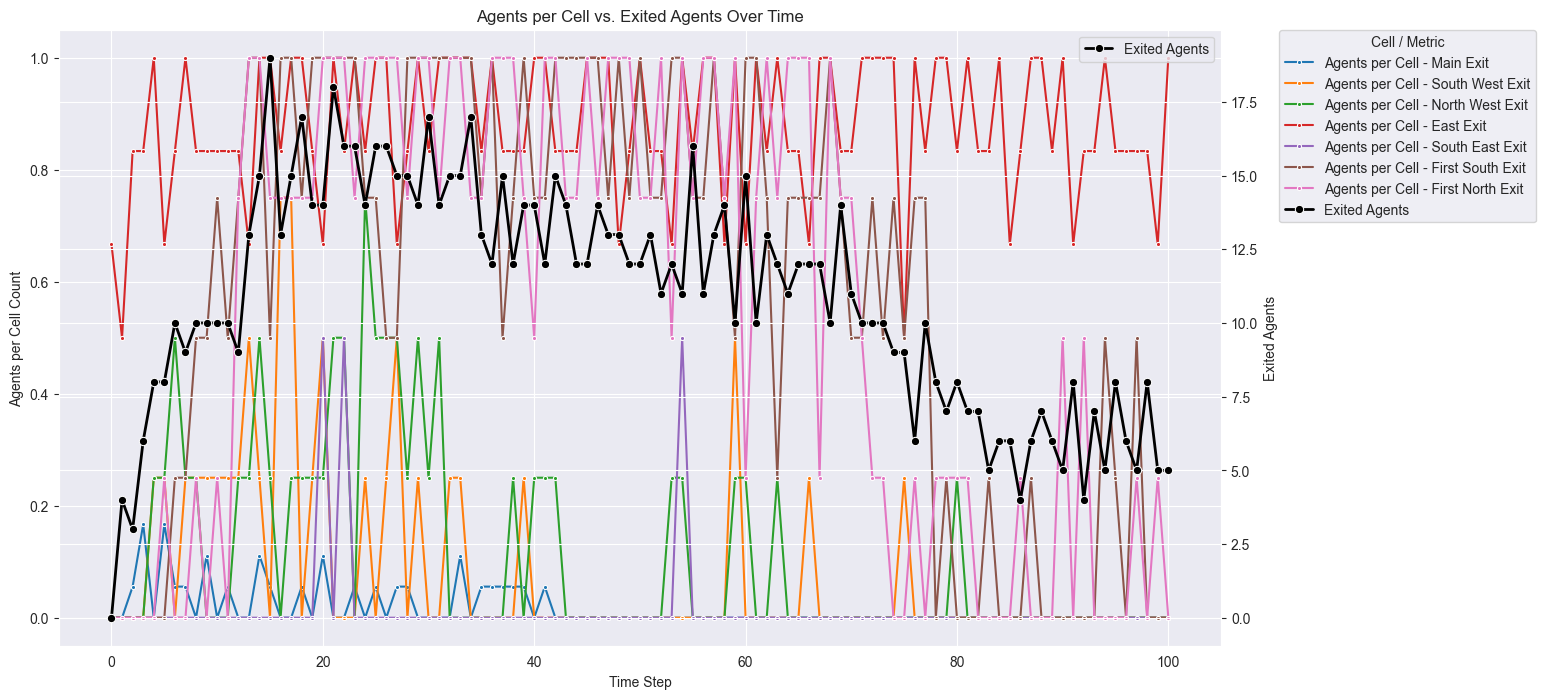

In [43]:
# If your dataframe is called model_data and has all the required columns:
df = model_data.copy()

# Columns that you want to melt together for the line plot
melt_cols = [
    "Agents per Cell - Main Exit",
    "Agents per Cell - South West Exit",
    "Agents per Cell - North West Exit",
    "Agents per Cell - East Exit",
    "Agents per Cell - South East Exit",
    "Agents per Cell - First South Exit",
    "Agents per Cell - First North Exit"
]

# 1) Melt the DataFrame so each "Agents per Cell" column becomes a row
df_melt = df.melt(
    id_vars=["Time Step", "Exited Agents"],
    value_vars=melt_cols,
    var_name="Cell",
    value_name="Agents"
)

# 2) Create the line plot for Agents per Cell with Seaborn
plt.figure(figsize=(15, 8))
ax = sns.lineplot(
    data=df_melt,
    x="Time Step",
    y="Agents",
    hue="Cell",
    marker="o",
    markersize = 3
)

# 3) Create a secondary y-axis for plotting the line (Exited Agents)
ax2 = ax.twinx()
sns.lineplot(
    data=df,
    x="Time Step",
    y="Exited Agents",
    ax=ax2,
    color="black",
    linewidth=2,
    marker="o",
    label="Exited Agents"  # This label will show in a combined legend
)

# 4) Label and adjust the axes
ax.set_title("Agents per Cell vs. Exited Agents Over Time")
ax.set_ylabel("Agents per Cell Count")  # Left y-axis label
ax2.set_ylabel("Exited Agents")         # Right y-axis label

# 5) Combine or adjust the legends
# First, get the handles and labels for both axes
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# We remove duplicate label "Exited Agents" from the first set if it exists
# (sometimes lineplot can create combined legend entries).
filtered_handles_labels = [
    (h, l) for (h, l) in zip(handles2, labels2) if l not in labels1
]
handles = handles1 + [h for (h, l) in filtered_handles_labels]
labels = labels1 + [l for (h, l) in filtered_handles_labels]

# Place the combined legend
ax.legend(handles, labels, loc="upper left", title="Cell / Metric", bbox_to_anchor=(1.05, 1), borderaxespad=0)

plt.show()

In [27]:
df

,Time Step,Active Agents,Exited Agents,Cumulative Exited Agents,Agents per Cell - Main Exit,Agents per Cell - South West Exit,Agents per Cell - North West Exit,Agents per Cell - East Exit,Agents per Cell - South East Exit,Agents per Cell - First South Exit,Agents per Cell - First North Exit,Exit Speed
0,0,1501,0,0,0.000000,0.00,0.00,0.500000,0.0,0.00,0.00,NaN
1,1,1498,3,3,0.055556,0.00,0.25,0.333333,0.0,0.00,0.00,3.000000
2,2,1494,4,7,0.000000,0.00,0.00,0.666667,0.0,0.00,0.00,3.500000
3,3,1490,4,11,0.000000,0.00,0.25,1.000000,0.0,0.00,0.00,3.666667
4,4,1483,7,18,0.000000,0.00,0.00,0.833333,0.0,0.00,0.25,4.500000
5,5,1477,6,24,0.111111,0.25,0.00,0.666667,0.5,0.25,0.00,4.800000
